<h1 style = "font-size:3rem;color:DarkCyan">Preprocessing Data for supervised training</h1>

- Extract features & provide with label
- Scale features
- Reduce dimensionality when required
- Save to data set

In [1]:
#import libraries
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import librosa, librosa.display 
import IPython.display as ipd
import scipy
import os
import pandas as pd

import sklearn

In [2]:
# import dataset, in this case different percussion sounds

filenames = os.listdir('./data')
print(f'Number of audio files: {len(filenames)} ')


Number of audio files: 167 


<h2 style = "font-size:2rem;color:DarkCyan">Extracting features</h2>

- Extracting features (we'll be reducting the number of features later) for each audio file, and store in a NxF matrix
- Take mean to deal with different file lengths
- Provide each with a label

In [3]:
def extract_features(data):
    return [
        np.mean(librosa.feature.spectral_centroid(y = data)),
        np.mean(librosa.feature.spectral_bandwidth(y = data)),
        np.mean(librosa.feature.spectral_flatness(y = data)),
        np.mean(librosa.feature.spectral_rolloff(y = data)),
        np.mean(librosa.feature.mfcc(y = data)),
        np.mean(librosa.feature.spectral_contrast(y = data)),
        np.mean(librosa.feature.zero_crossing_rate(y = data)),
        np.mean(librosa.feature.rms(y = data)),
        np.mean(librosa.feature.tempogram(y=data))
    ]

In [4]:
def get_label(name):
    if name.find('clap') != -1:
        return 0
    elif name.find('cymbal') != -1:
        return 1
    elif name.find('kick') != -1:
        return 2
    else:
        return 3

In [35]:
sr = 48000
feature_names = ['sc','sbw','sf', 'sr', 'mfcc', 'scon', 'zcr', 'rms', 'tg']
amount_of_features = len(feature_names)

features = np.zeros((len(filenames), amount_of_features))
labels = np.zeros(len(filenames))

for i in range(len(filenames)):
    data, dummy = librosa.load('./data/'+ filenames[i], sr = sr, mono=True)
    
    # fill prediction array with correct label 
    labels[i] = get_label(filenames[i])
    
    # extract features
    features[i] = extract_features(data)
    
     # print process around every 5 %
    if i % (len(filenames) // 20) == 0:
        print(f'{100 * i // len(filenames)}% processed')
    

0% processed
4% processed
9% processed
14% processed
19% processed
23% processed
28% processed
33% processed
38% processed
43% processed
47% processed
52% processed
57% processed
62% processed
67% processed
71% processed
76% processed
81% processed
86% processed
91% processed
95% processed


<h2 style = "font-size:2rem;color:DarkCyan">Plotting features</h2>

<IPython.core.display.Javascript object>


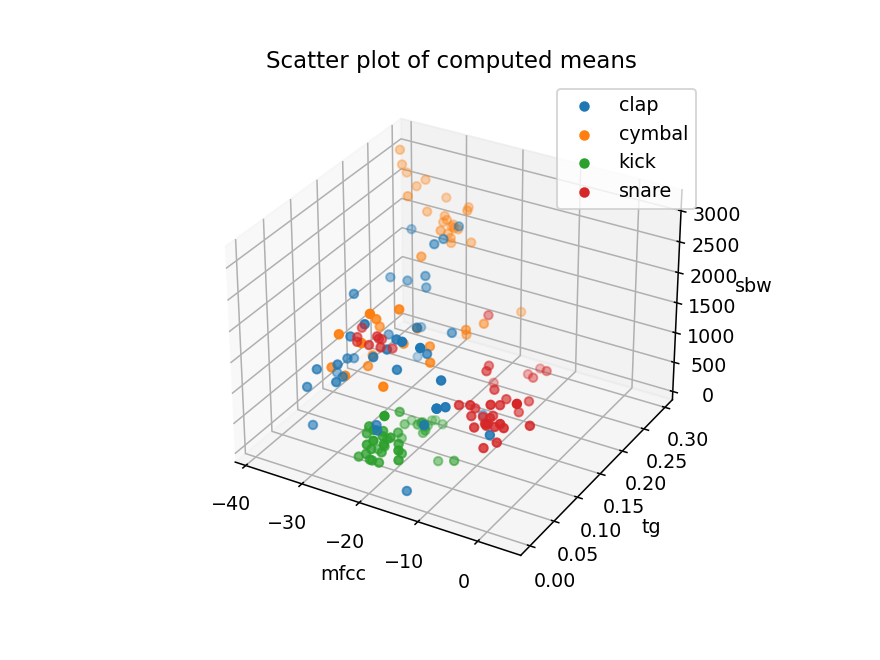

In [36]:
f_dict = {'sc' : 0, 'sbw' : 1, 'sf': 2, 'sr' : 3, 'mfcc' : 4, 'scon' : 5,'zcr' : 6, 'rms': 7, 'tg' : 8}
# choose three features

f1 = 'mfcc'
f2 = 'tg'
f3 = 'sbw'

# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[np.where(labels == 0),f_dict[f1]], features[np.where(labels == 0),f_dict[f2]], features[np.where(labels == 0),f_dict[f3]], label = 'clap')
ax.scatter3D(features[np.where(labels == 1),f_dict[f1]], features[np.where(labels == 1),f_dict[f2]], features[np.where(labels == 1),f_dict[f3]], label = 'cymbal')
ax.scatter3D(features[np.where(labels == 2),f_dict[f1]], features[np.where(labels == 2),f_dict[f2]], features[np.where(labels == 2),f_dict[f3]], label = 'kick')
ax.scatter3D(features[np.where(labels == 3),f_dict[f1]], features[np.where(labels == 3),f_dict[f2]], features[np.where(labels == 3),f_dict[f3]], label = 'snare')


#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')
ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)
ax.legend()

<h2 style = "font-size:2rem;color:DarkCyan">Scale features & plot again</h2>

- scale features for better comparison (after this step features will present zero mean and unit variance)

In [37]:
print('Mean and std before scaling',np.mean(features, axis=0),np.std(features, axis=0))

features = sklearn.preprocessing.scale(features)

print('Mean and std after scaling',np.mean(features, axis=0),np.std(features, axis=0))

Mean and std before scaling [ 1.60794752e+03  1.46614746e+03  1.78297782e-01  3.14417057e+03
 -1.81131847e+01  2.06562447e+01  8.94566901e-02  5.07136850e-02
  8.48584916e-02] [8.95756004e+02 7.02382780e+02 2.59673601e-01 1.77189515e+03
 9.59610701e+00 2.78300000e+00 6.32586899e-02 8.92786962e-02
 8.92904814e-02]
Mean and std after scaling [-9.67954924e-16 -3.90240069e-16  7.97765048e-18  4.21485867e-16
  2.88857428e-16  1.58090440e-15 -5.63753967e-16  4.48742839e-17
 -5.24530519e-16] [1. 1. 1. 1. 1. 1. 1. 1. 1.]


<IPython.core.display.Javascript object>


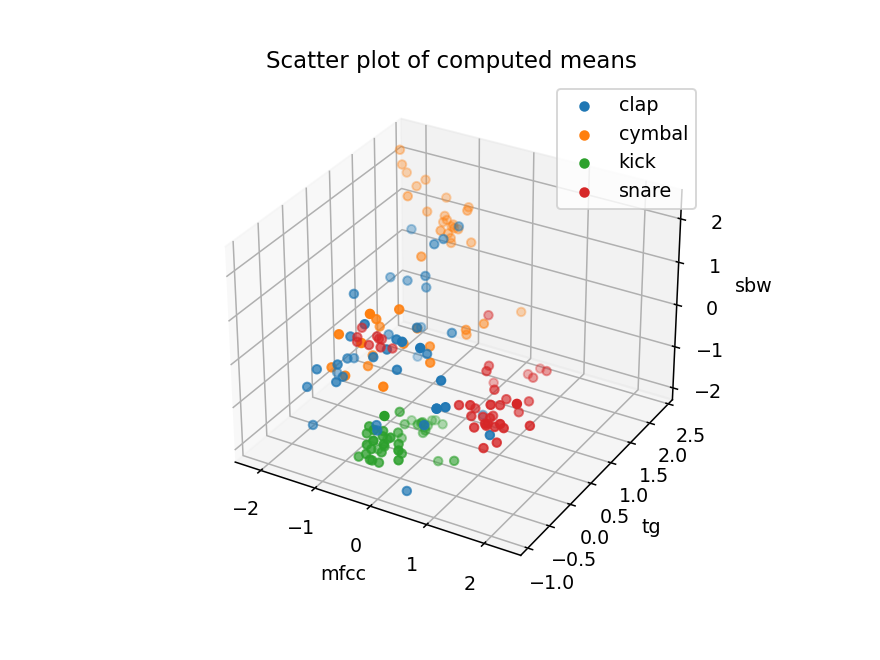

In [38]:
# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[np.where(labels == 0),f_dict[f1]], features[np.where(labels == 0),f_dict[f2]], features[np.where(labels == 0),f_dict[f3]], label = 'clap')
ax.scatter3D(features[np.where(labels == 1),f_dict[f1]], features[np.where(labels == 1),f_dict[f2]], features[np.where(labels == 1),f_dict[f3]], label = 'cymbal')
ax.scatter3D(features[np.where(labels == 2),f_dict[f1]], features[np.where(labels == 2),f_dict[f2]], features[np.where(labels == 2),f_dict[f3]], label = 'kick')
ax.scatter3D(features[np.where(labels == 3),f_dict[f1]], features[np.where(labels == 3),f_dict[f2]], features[np.where(labels == 3),f_dict[f3]], label = 'snare')


#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')
ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)
ax.legend()

<h2 style = "font-size:2rem;color:DarkCyan">Correlation Matrix</h2>

In [39]:
# custom plot function
def plot_correlation_matrix(features, feature_labels, cmap= 'coolwarm', size = [6,6], fontsize=7):
    # get correlation matrix
    df = pd.DataFrame(features, columns=feature_labels)
    corr = np.array(df.corr())
    
    print(corr[0])
    
    title = 'Correlation Matrix'
        
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(corr, interpolation='nearest', cmap= cmap)
    ax.figure.colorbar(im, ax=ax)
    
    
    # set labels ticks
    ticks = np.arange(corr.shape[1])
    ax.set(xticks=ticks,
           yticks=ticks,
           xticklabels=feature_labels, 
           yticklabels=feature_labels,
          )
    
    ax.set_title(title, fontsize = 20)

    #style tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", color = 'darkgrey', fontsize = fontsize , weight='bold')
    plt.setp(ax.get_yticklabels(), ha="right",
             rotation_mode="anchor", color = 'darkgrey', fontsize = fontsize, weight = 'bold')
    
    # plot text annotation inside each segment
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(j, i, format(corr[i, j], '.3f'),
                    ha="center", va="center",
                    color="black",
                    fontsize = fontsize)
    
    fig.tight_layout()
    plt.show()

[ 1.          0.91521699 -0.68722641  0.97905214 -0.28568196  0.39757294
  0.9004147  -0.17890616  0.3703543 ]


<IPython.core.display.Javascript object>


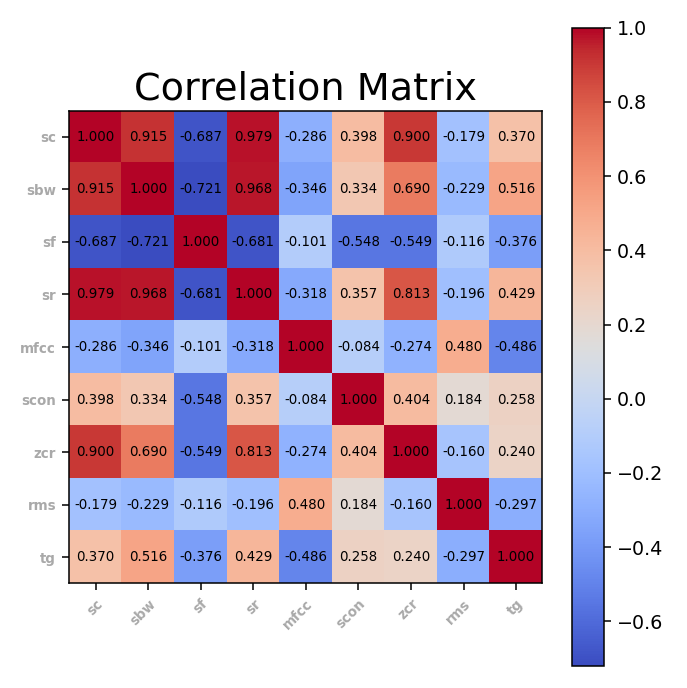

In [40]:
plot_correlation_matrix(features, feature_names, size=[5,5])

<h2 style = "font-size:2rem;color:DarkCyan">Dimensionality Reduction</h2>

In [41]:
# from the correlation matrix can be seen that there are 
# spectral centroid, bandwidth, and roll-off are strongly correrelated 
# with other features, these can be discarded to simplify the model
features_to_exclude = ['sc', 'sbw', 'sr']
print(np.shape(features))
indexes = np.where(np.isin(feature_names,features_to_exclude))
print(indexes)

selected_features = []
new_feature_names =[]
for i in range(0,amount_of_features):
    if not np.isin(i,indexes):
        selected_features.append(features[:,i])
        new_feature_names.append(feature_names[i])
        
#features = features[:,2:]
selected_features= np.array(selected_features).T
print(np.shape(selected_features))
print(new_feature_names)
#feature_names = feature_names[2:]

(167, 9)
(array([0, 1, 3], dtype=int64),)
(167, 6)
['sf', 'mfcc', 'scon', 'zcr', 'rms', 'tg']


<h2 style = "font-size:2rem;color:DarkCyan">Save Features</h2>

- scale features for better comparison (after this step features will present zero mean and unit variance)

In [42]:
#merging everything into a single data structure
dataset = pd.DataFrame(selected_features)
dataset.columns = new_feature_names #naming the features
dataset['label'] = labels
dataset['filename'] = filenames

#we can save the dataset to a file to resume working without re-computing the features (unless you want to change them)
dataset.to_csv('dataset.csv')
dataset

,sf,mfcc,scon,zcr,rms,tg,label,filename
0,-0.650937,0.201820,-0.181805,2.359166,-0.087440,0.422940,0.0,clap00.wav
1,-0.455283,0.319636,-0.156507,1.448470,0.460283,-0.815594,0.0,clap01.wav
2,-0.582337,0.004219,-0.096929,1.530512,0.112806,-0.552268,0.0,clap02.wav
3,-0.481064,-1.139505,0.943533,2.719303,0.093284,0.711343,0.0,clap03.wav
4,-0.677210,-1.122057,0.161869,0.490405,-0.428324,-0.130251,0.0,clap04.wav
...,...,...,...,...,...,...,...,...
162,-0.551290,-0.087366,0.171507,1.413513,-0.314272,-0.779622,3.0,snare_37.wav
163,-0.601877,-0.097283,-0.141917,0.905417,-0.293384,-0.516386,3.0,snare_38.wav
164,-0.628628,-0.308812,0.533378,0.223181,-0.347412,-0.759175,3.0,snare_39.wav
165,-0.603429,-0.261414,-0.104417,0.660124,-0.320820,-0.642373,3.0,snare_40.wav
